In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19/dataset.xlsx


In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)


*this code is generated by following youtube channel : learnia machine * 

**Exploratory data analysis**
*Check list:*
1. Identifying the target variable : SARS-Cov-2 exam result
2. Identifying number of rows and columns: 5644 observations et 111 features
3. Identifying data types:74 quantitative variables (float64 + int64), 37qualitatives variables(object)
4. Checking the missing values : .  Most values are NAN (most variables >90% NAN) 
                                 .  2 groups: 76% NAN --> viral test 
                                            89% NAN --> blood level
5. Initial visualization: drop NAN columns : variables with >90% Nan values
6. Target visualization: imbalanced data set Beacause only 10%  are positive to Sars-cov
7. Variable analysis:
    . continuous variables : . Dtype float: are standardized, Skewed Distribution, blood level.
                             . Dtype int64 "Patient age quantile" : distplot not clear age [0-20]?? --> may be 
                                                      this variable transformed with quantile transformer.
    . discrete variables:   categorical/quantitative/Dtype object: variables with binary values, viral test
                                                                   Drop Parainfluenza 2 variable with 1 value 
                                                                   [nan 'not_detected']
                                                                  - Rhinovirus/Enterovirus detected positive 
8. Relationship between target/variables(features):
                                                                   
   Hypothesis: . Relations between platelets, leukocytes, basophils, eosinophils,monocytes and Covid
               . Relation between age and covid but we have not more details abour age variable.
               . Some patients (6) are detected positive in both Rhinovirus/Enterovirus and Covid, but no 
                 relationship between viral variables and target.
               
9. Relationship between variable/variable:
               .  Between blood/blood: strong correlations between Hematocrit/Hemoglobin.
               .  Between blood/age:  weak correlations between blood and age.
               .  Between viral/viral: Influenza A, rapid test give a bad results.
               .  Between be sick/blood: we have a diffrence between blood/ be sick and blood/covid
               .  Between Patient addmited/blood: predict in which unit (semi intensive/regular wrad/..)                                                                                a patient should go.
               .  Between Patient addmited/is_sick:
10. analysis of Nan values:
               .  viral_cols: 1350 (92 /8)
               .  blood_cols: 600 (87/13)
               .  both: drop nan values=90 values
               
**Hypothesis H0:**
* Patients with covid have high level of platelets, leukocytes, basophils, eosinophils,monocytes.
> * H0: blood level are equal in positive covid and negative covid patients --> use test student


**Preprocessing**


In [3]:
#read data
data = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [4]:
df=data.copy()
print(f' Le data set contient {df.shape[0]} observations et {df.shape[1]} features')


 Le data set contient 5644 observations et 111 features


In [5]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglob

In [6]:
df.dtypes.value_counts()#.plot.pie() 

float64    70
object     37
int64       4
dtype: int64

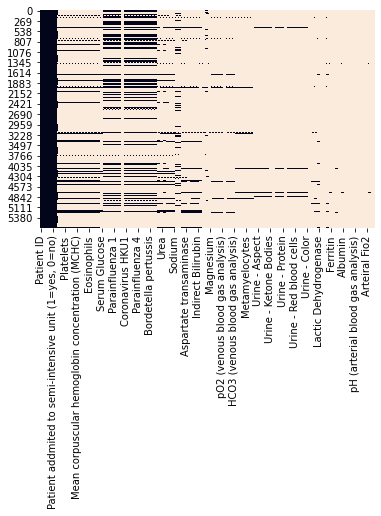

In [7]:
sns.heatmap(df.isna(),cbar=False)

In [8]:
#data .info()
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

In [9]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

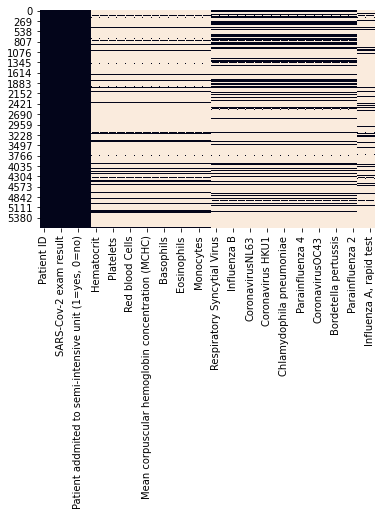

In [10]:
sns.heatmap(df.isna(),cbar=False)

In [11]:
df=df.drop('Patient ID',axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [12]:
#visualise the target variable
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

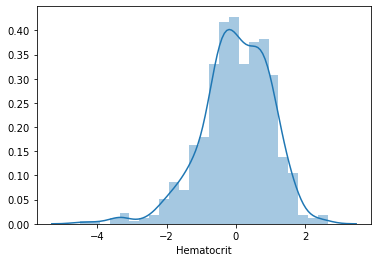

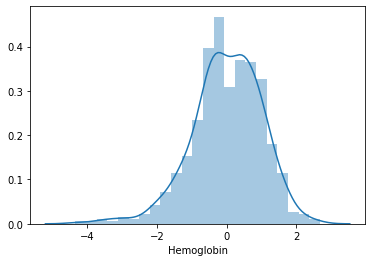

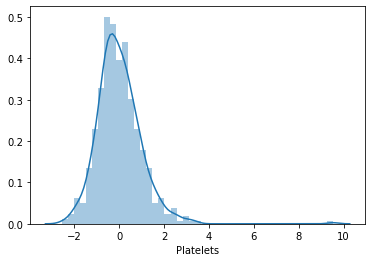

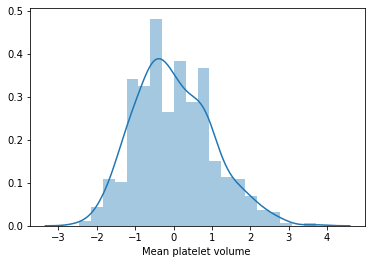

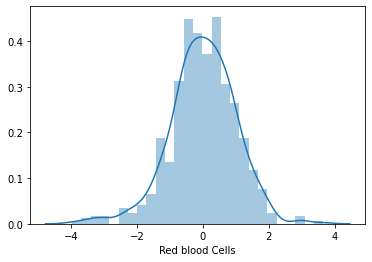

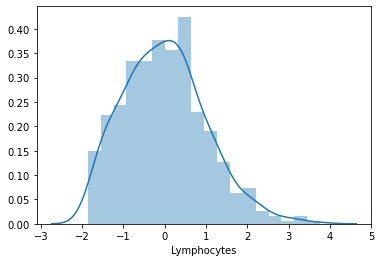

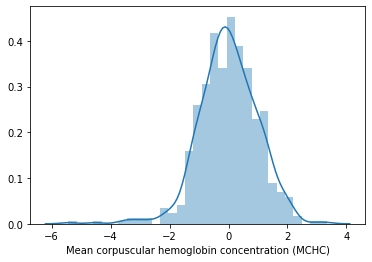

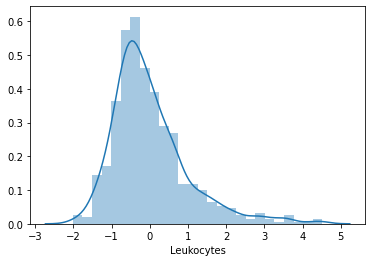

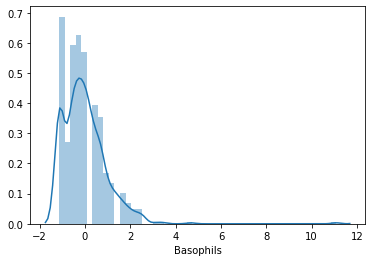

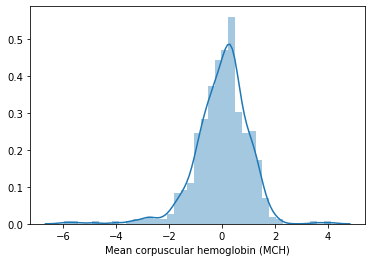

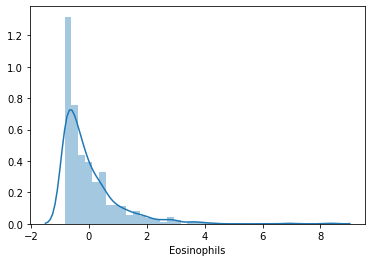

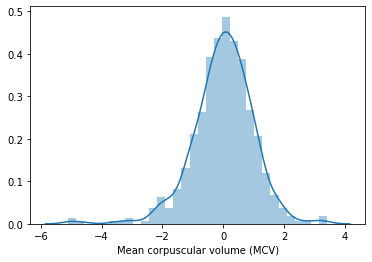

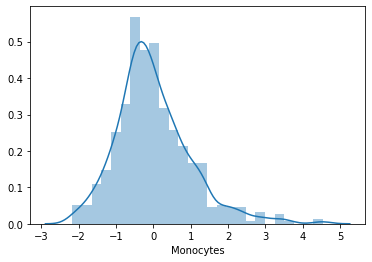

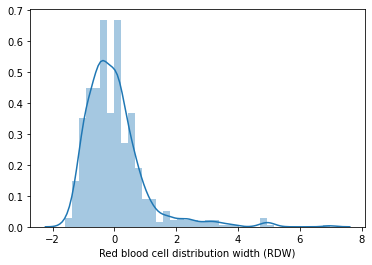

In [13]:
#analysis of  continuous variables
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

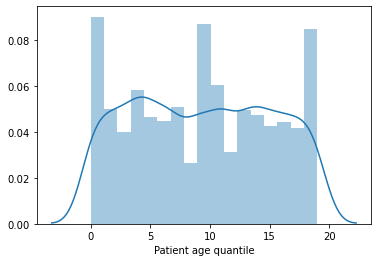

In [14]:
plt.figure()
sns.distplot(df['Patient age quantile'])

In [15]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

In [16]:
#qualiltative variable
for col in df.select_dtypes('object'):
    print(f'{col :-<20},{df[col].unique()}')


SARS-Cov-2 exam result,['negative' 'positive']
Respiratory Syncytial Virus,[nan 'not_detected' 'detected']
Influenza A---------,[nan 'not_detected' 'detected']
Influenza B---------,[nan 'not_detected' 'detected']
Parainfluenza 1-----,[nan 'not_detected' 'detected']
CoronavirusNL63-----,[nan 'not_detected' 'detected']
Rhinovirus/Enterovirus,[nan 'detected' 'not_detected']
Coronavirus HKU1----,[nan 'not_detected' 'detected']
Parainfluenza 3-----,[nan 'not_detected' 'detected']
Chlamydophila pneumoniae,[nan 'not_detected' 'detected']
Adenovirus----------,[nan 'not_detected' 'detected']
Parainfluenza 4-----,[nan 'not_detected' 'detected']
Coronavirus229E-----,[nan 'not_detected' 'detected']
CoronavirusOC43-----,[nan 'not_detected' 'detected']
Inf A H1N1 2009-----,[nan 'not_detected' 'detected']
Bordetella pertussis,[nan 'not_detected' 'detected']
Metapneumovirus-----,[nan 'not_detected' 'detected']
Parainfluenza 2-----,[nan 'not_detected']
Influenza B, rapid test,[nan 'negative' 'positive'

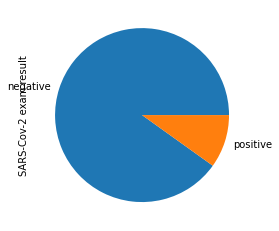

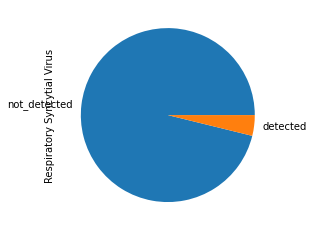

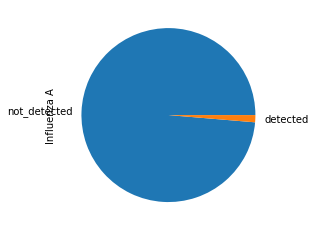

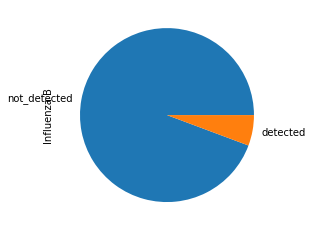

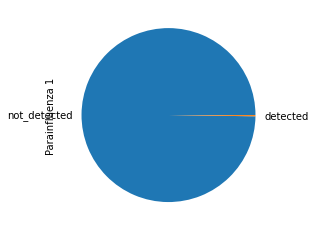

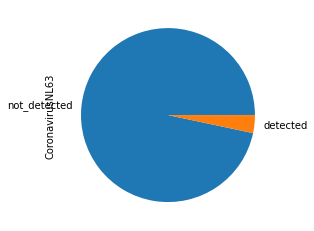

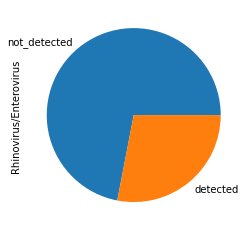

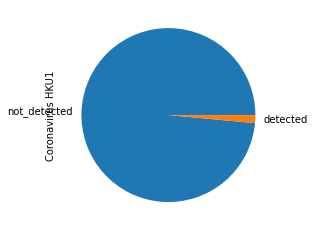

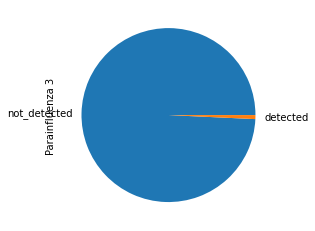

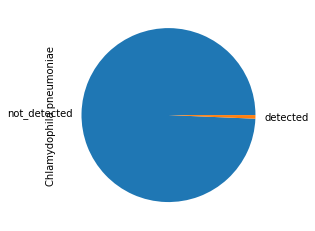

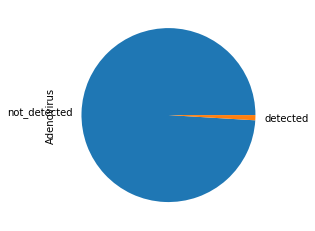

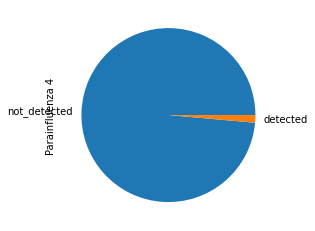

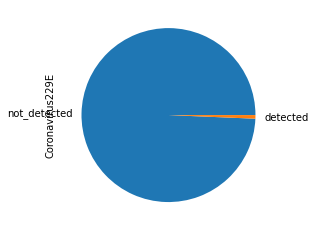

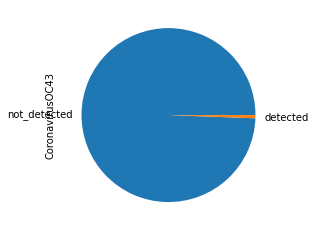

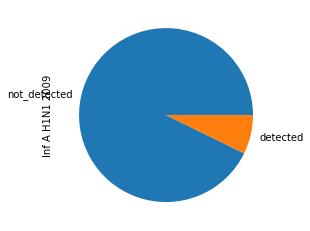

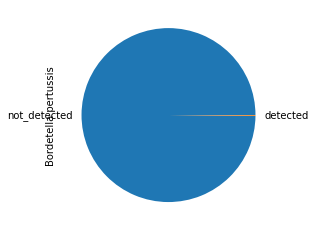

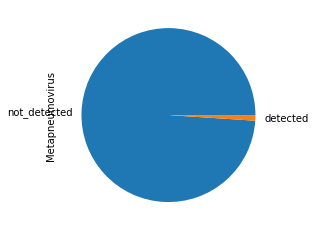

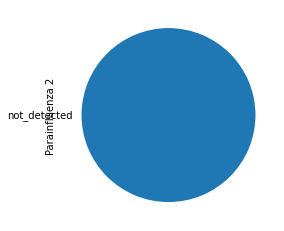

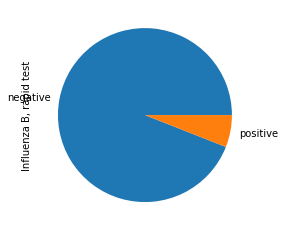

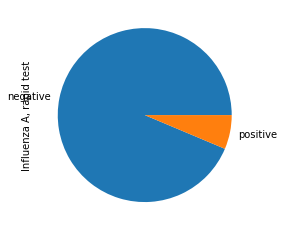

In [17]:
#qualiltative variable
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie() 

### Relationship between target/variables


In [18]:
#create positive and neagative subsets
positive_df=df[df['SARS-Cov-2 exam result']=='positive']
negative_df=df[df['SARS-Cov-2 exam result']=='negative']

In [19]:
#create viral and blood subsets
missing=df.isna().sum()/df.shape[0]


In [20]:
viral_cols=df.columns[(missing<0.88)&(missing>0.75)]
blood_dcols=df.columns[(missing<0.9)&(missing>0.88)]         

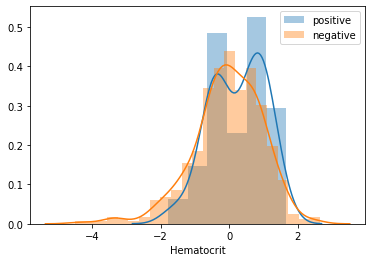

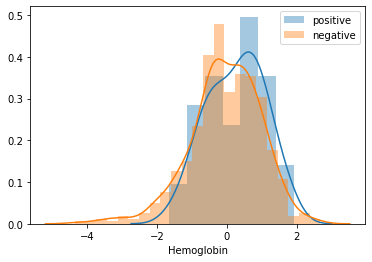

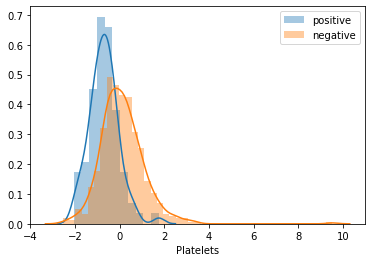

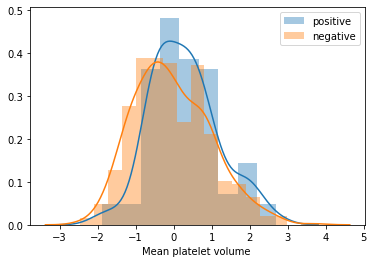

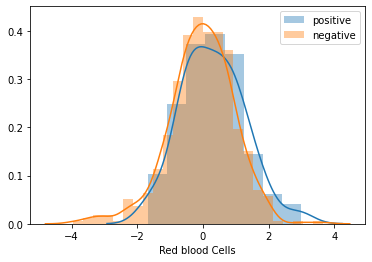

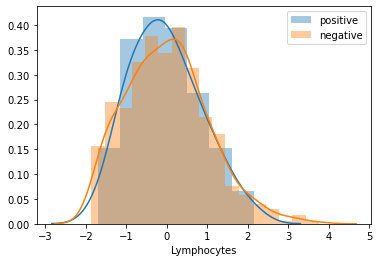

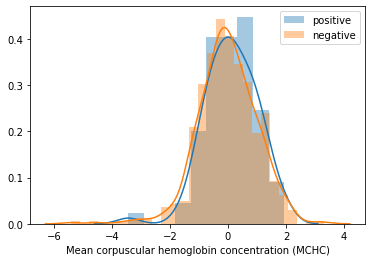

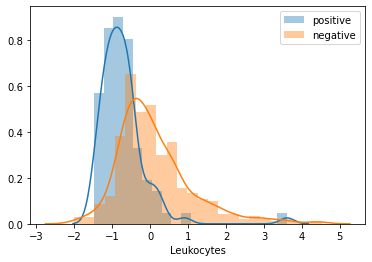

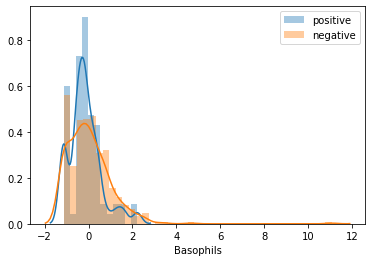

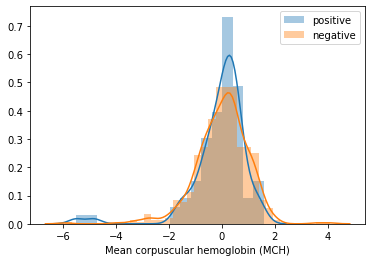

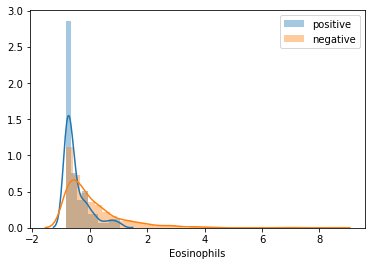

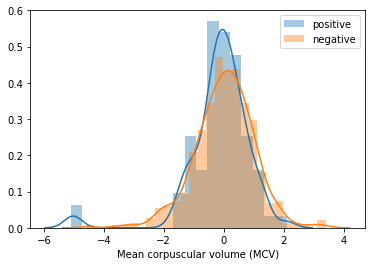

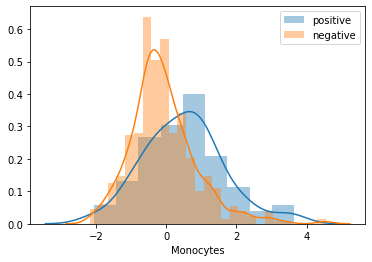

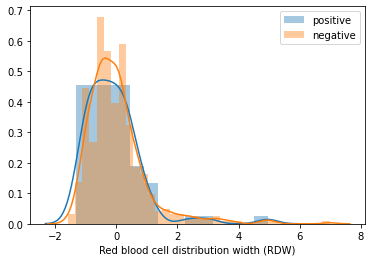

In [21]:
#relationship between blood/target
for col in blood_dcols:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

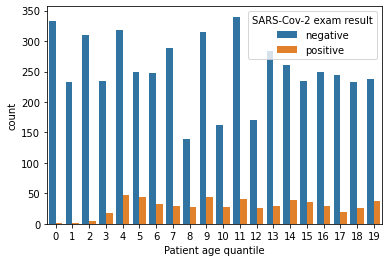

In [22]:
#relationship between target/age 
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

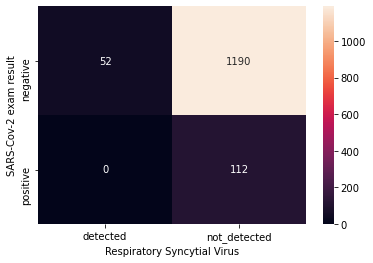

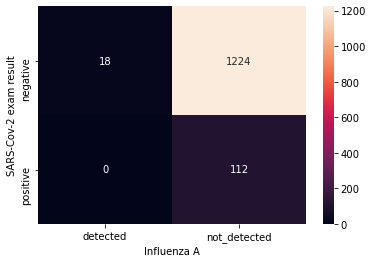

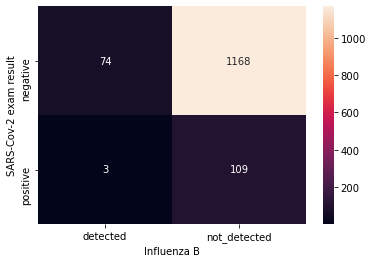

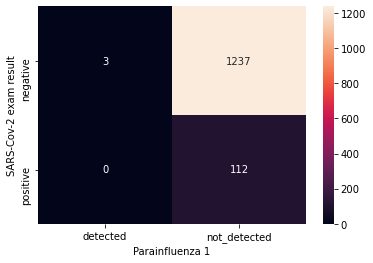

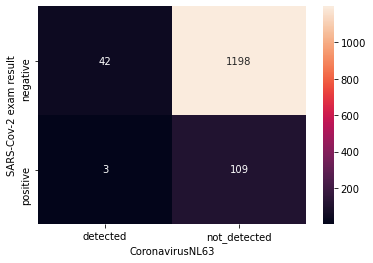

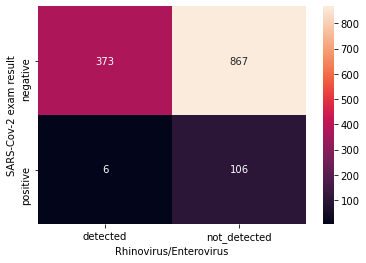

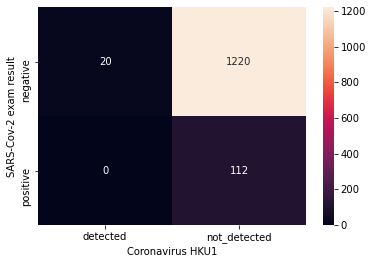

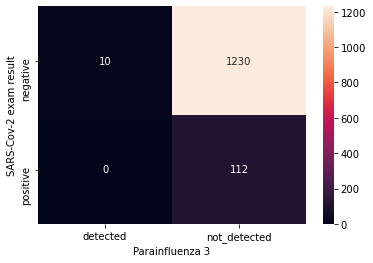

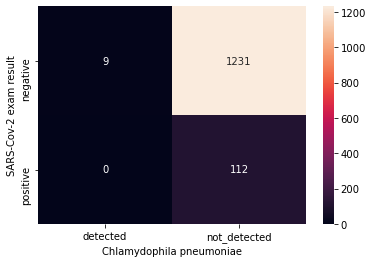

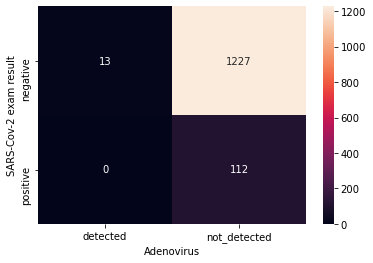

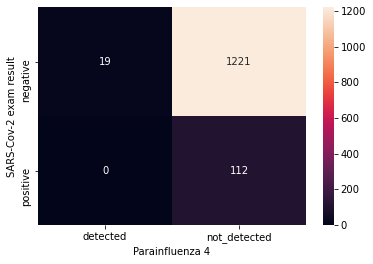

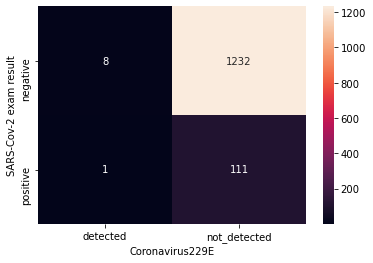

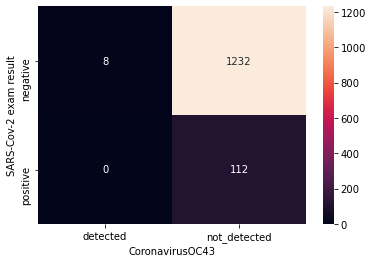

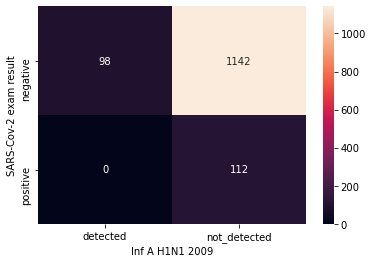

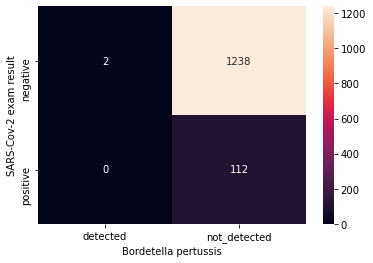

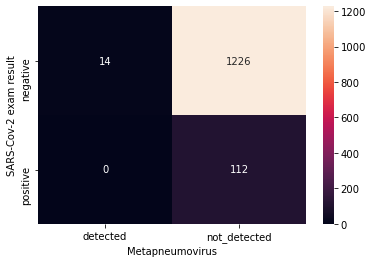

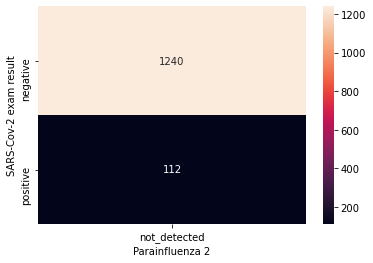

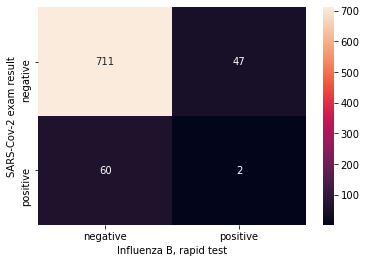

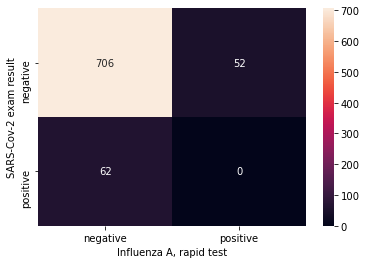

In [23]:
#relationship between viral variable/target
for col in viral_cols:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')
    

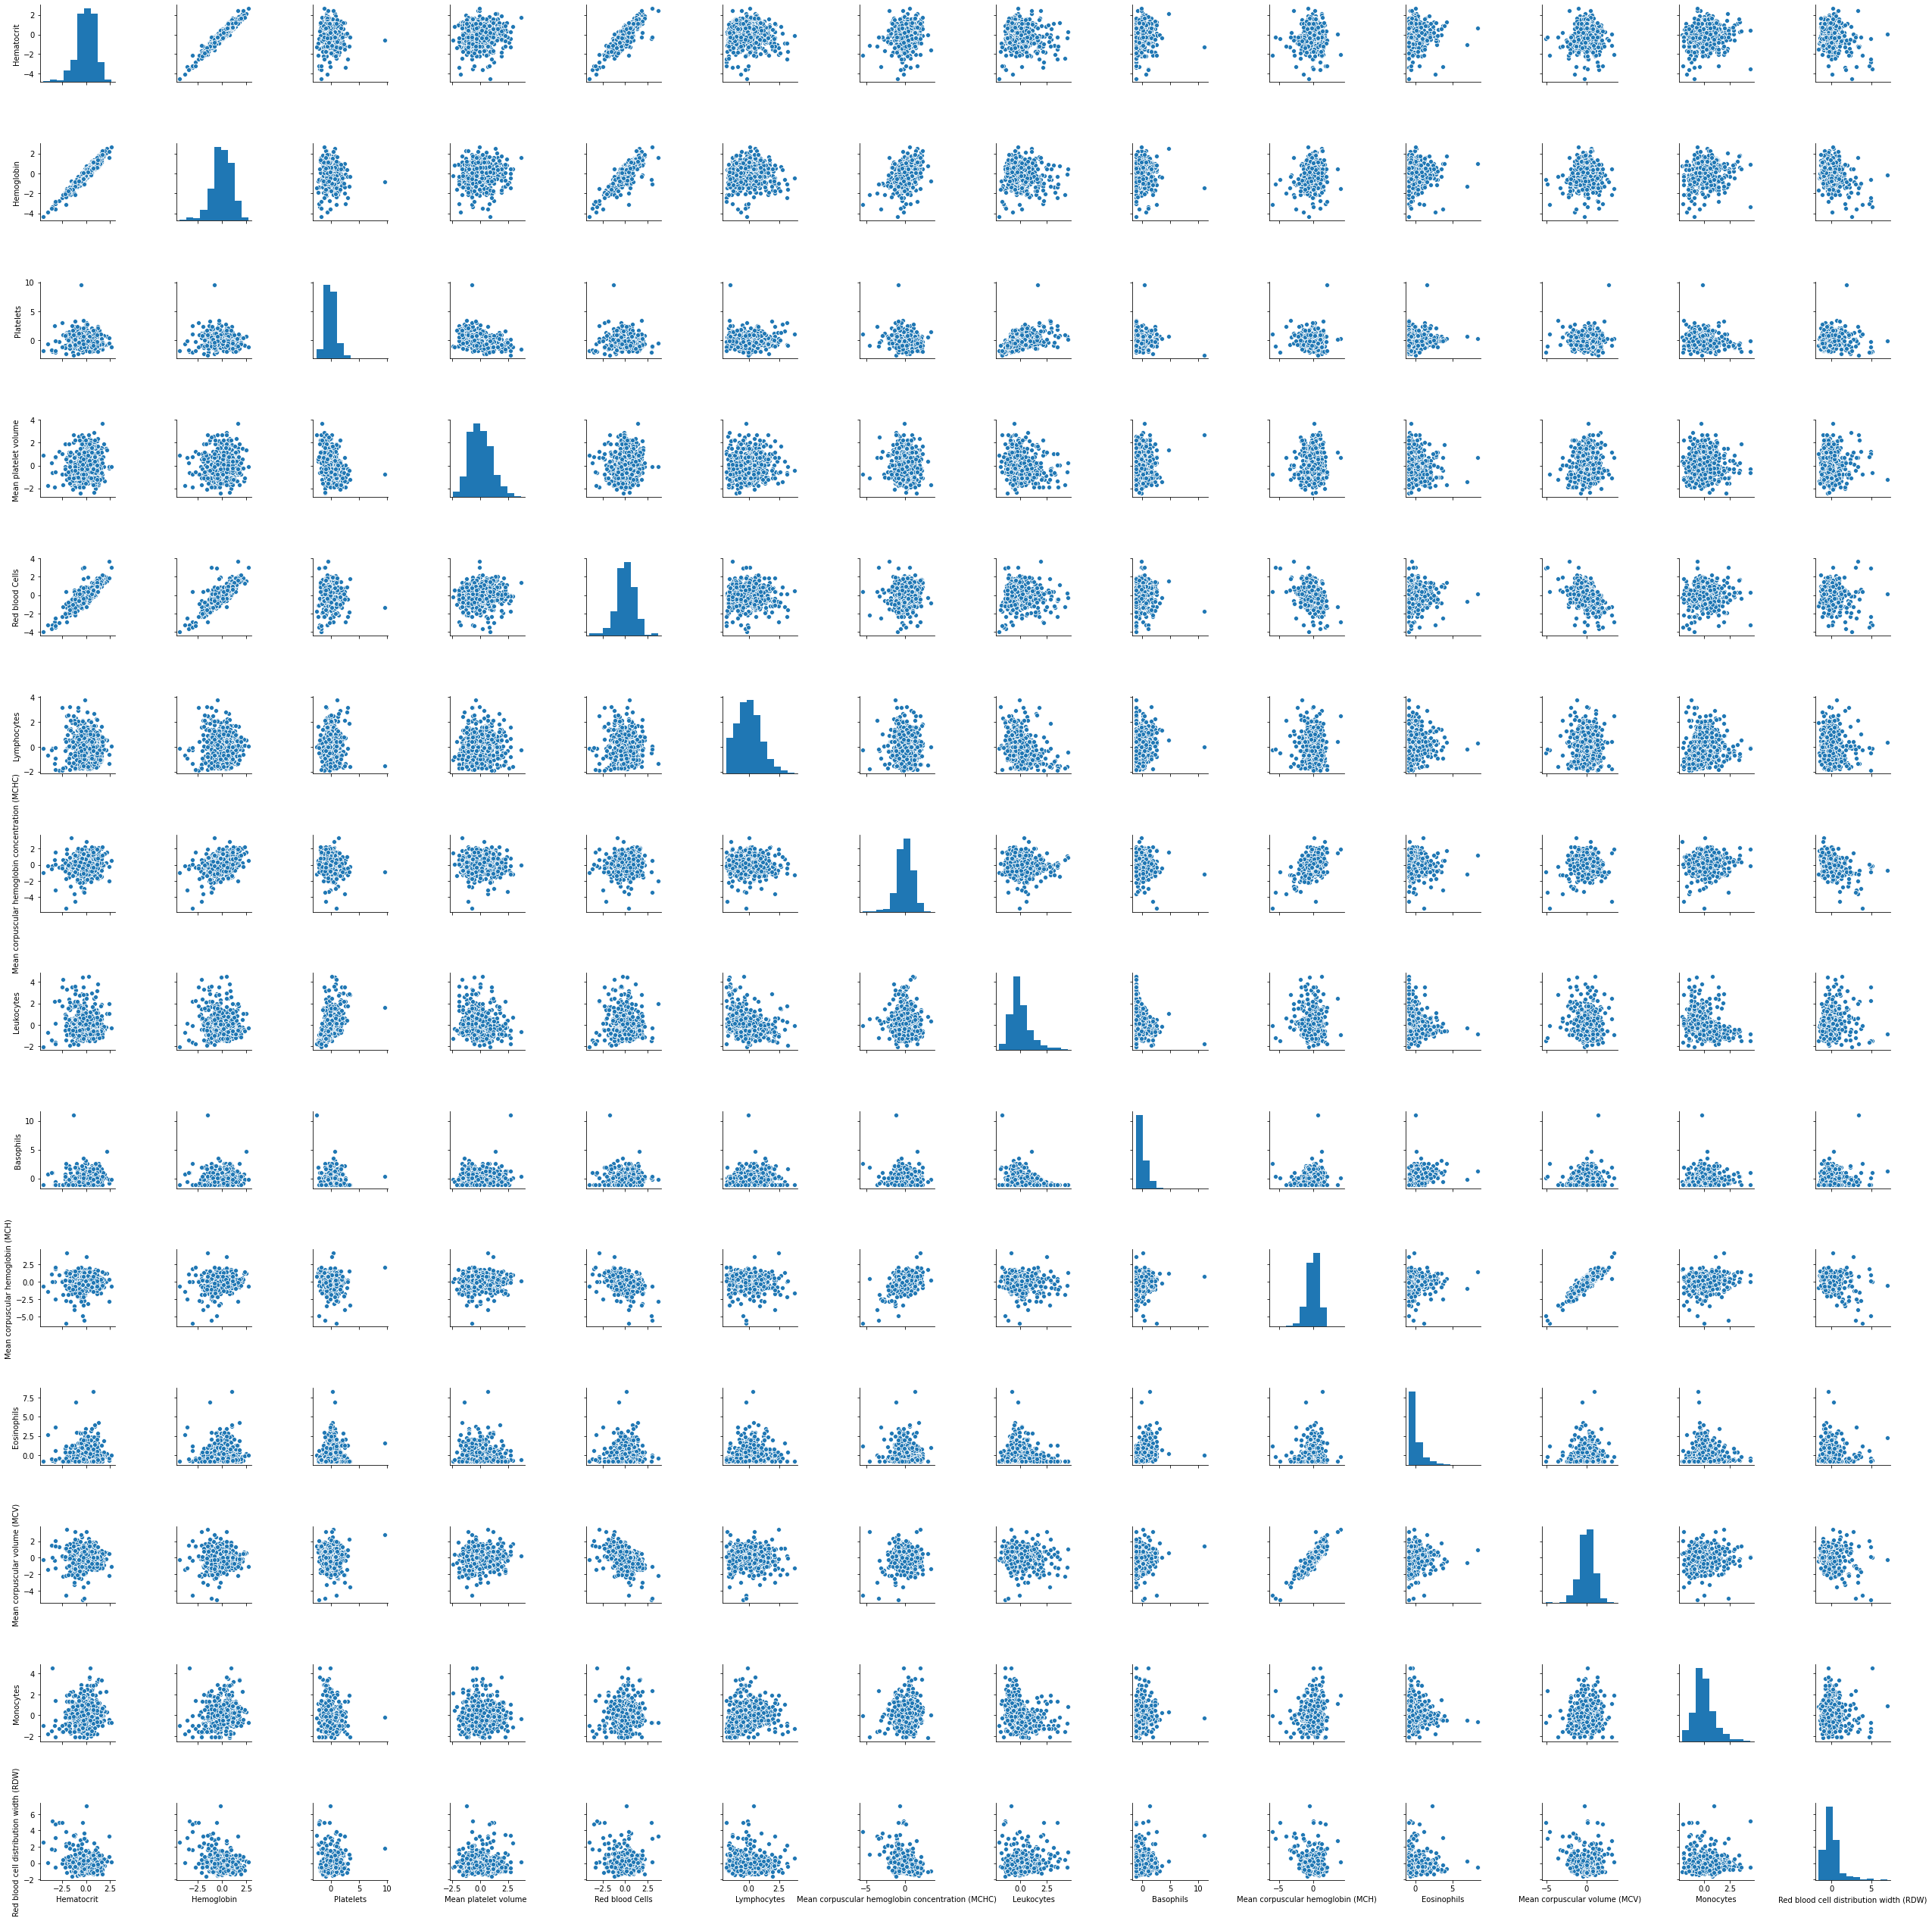

In [24]:
#relationship between blood/blood
sns.pairplot(df[blood_dcols])

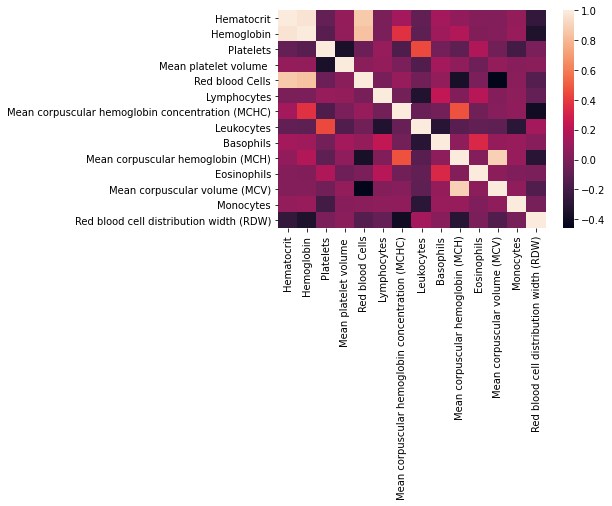

In [25]:
sns.heatmap(df[blood_dcols].corr())

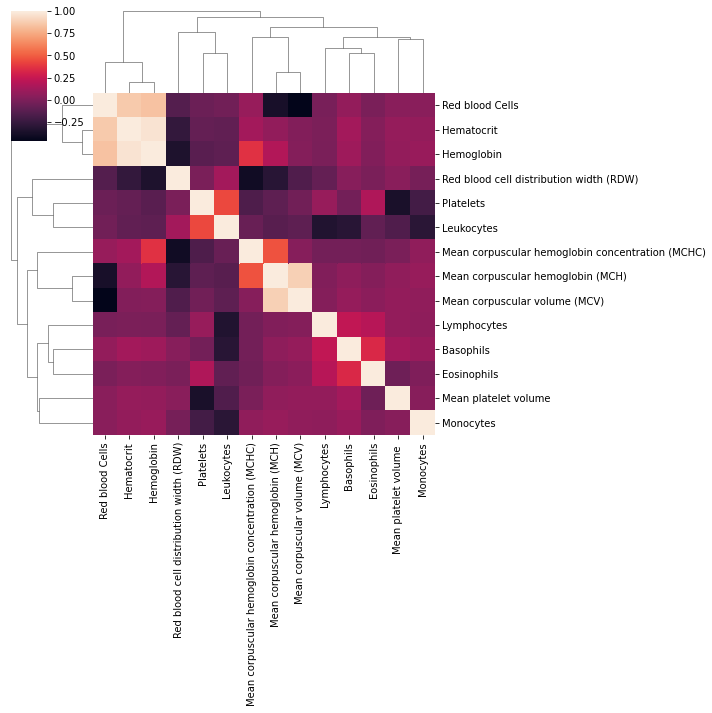

In [26]:
sns.clustermap(df[blood_dcols].corr())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retain

<Figure size 432x288 with 0 Axes>

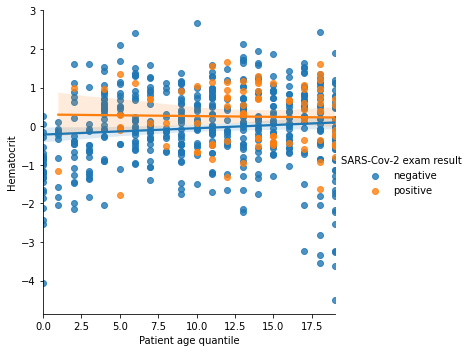

<Figure size 432x288 with 0 Axes>

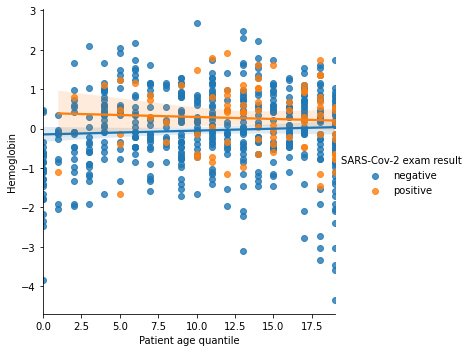

<Figure size 432x288 with 0 Axes>

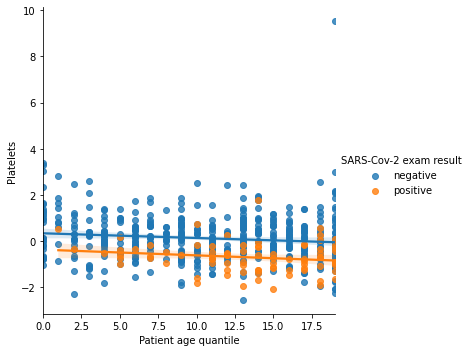

<Figure size 432x288 with 0 Axes>

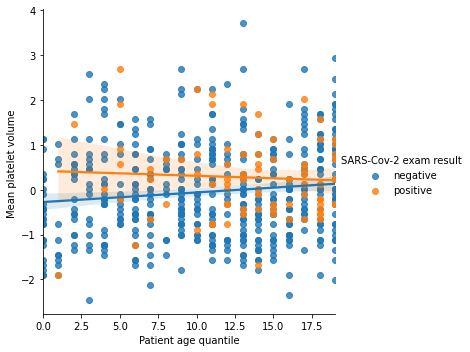

<Figure size 432x288 with 0 Axes>

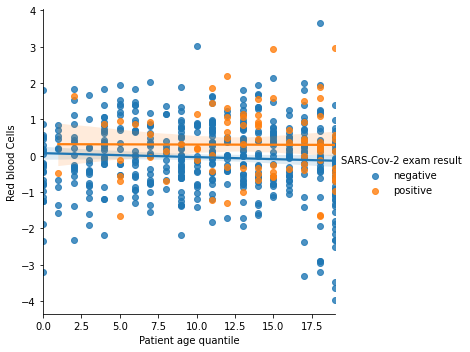

<Figure size 432x288 with 0 Axes>

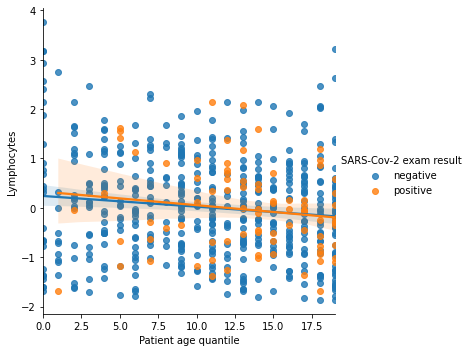

<Figure size 432x288 with 0 Axes>

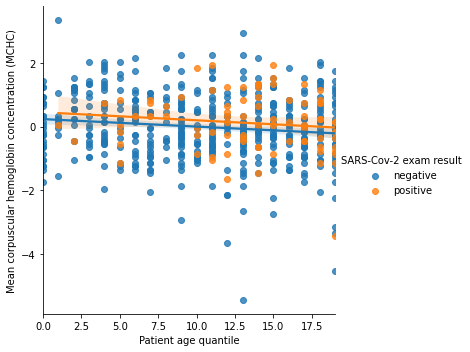

<Figure size 432x288 with 0 Axes>

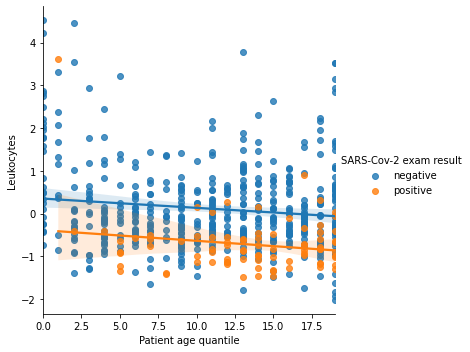

<Figure size 432x288 with 0 Axes>

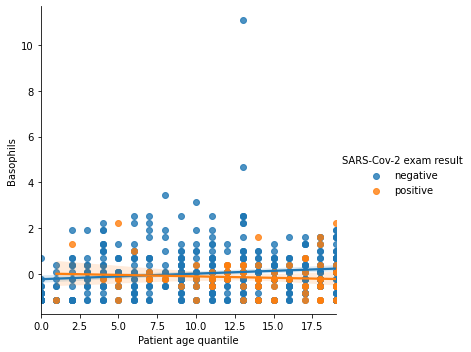

<Figure size 432x288 with 0 Axes>

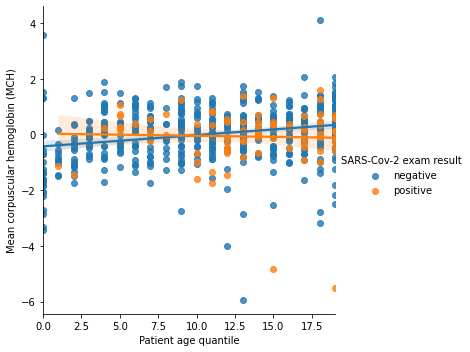

<Figure size 432x288 with 0 Axes>

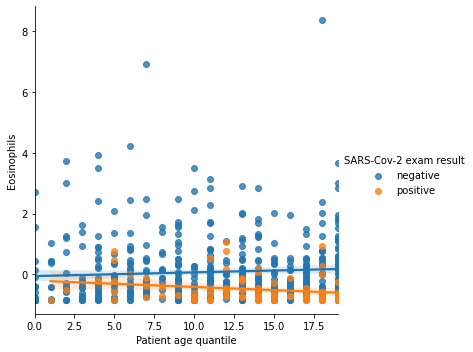

<Figure size 432x288 with 0 Axes>

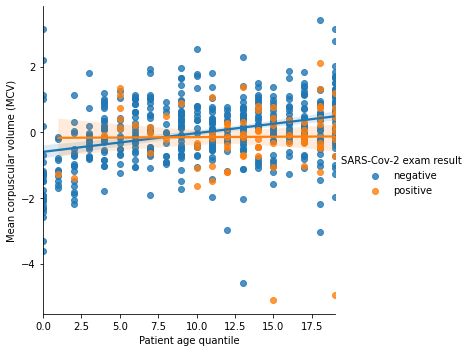

<Figure size 432x288 with 0 Axes>

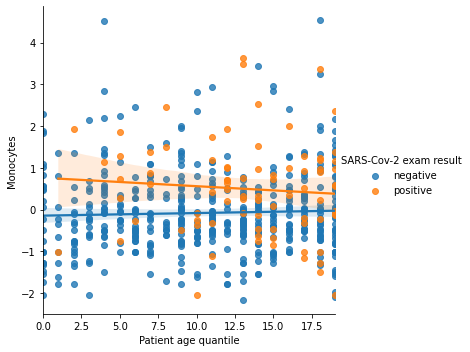

<Figure size 432x288 with 0 Axes>

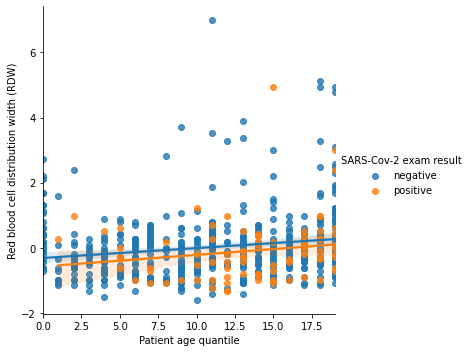

In [27]:
#relationship between blood/target
for col in blood_dcols:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col, hue='SARS-Cov-2 exam result',data=df)

In [28]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [29]:
pd.crosstab(df['Influenza A, rapid test'],df['Influenza A'])

Influenza A              detected  not_detected
Influenza A, rapid test                        
negative                        2           245
positive                        4            15

In [30]:
pd.crosstab(df['Influenza B, rapid test'],df['Influenza B'])

Influenza B              detected  not_detected
Influenza B, rapid test                        
negative                       18           233
positive                       11             4

In [31]:
#create variable is sick to visualize patients who are sick or not
df['is_sick']=np.sum(df[viral_cols[:-2]]=='detected', axis=1)>=1


In [32]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [33]:
#create positive and neagative subsets
positive_is_sick=df[df['is_sick']==True]
negative_is_sick=df[df['is_sick']==False]

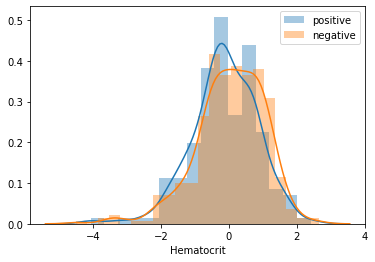

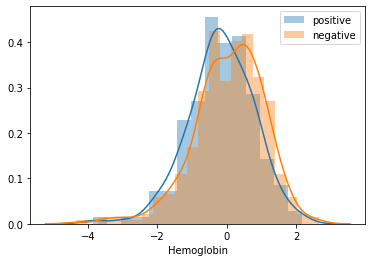

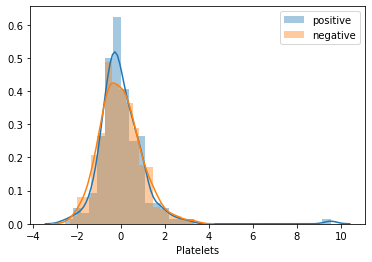

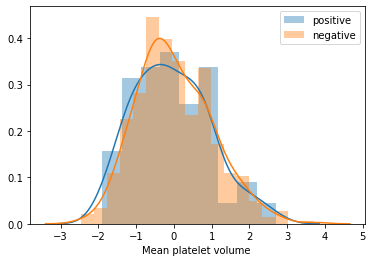

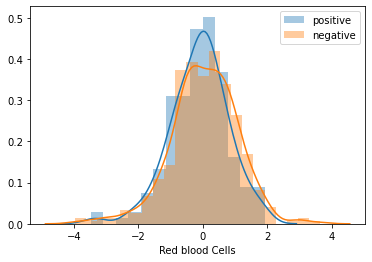

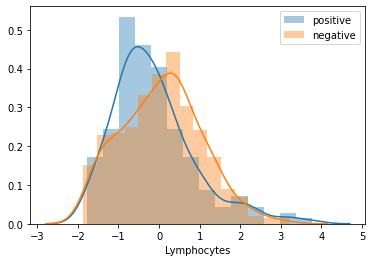

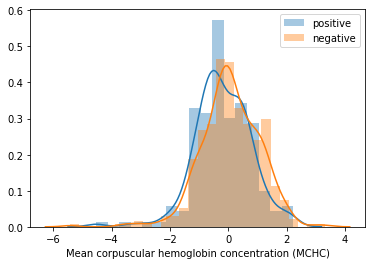

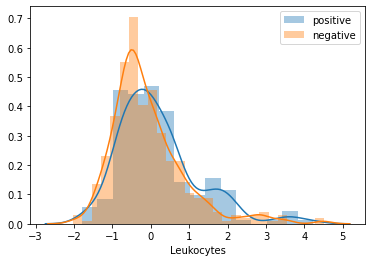

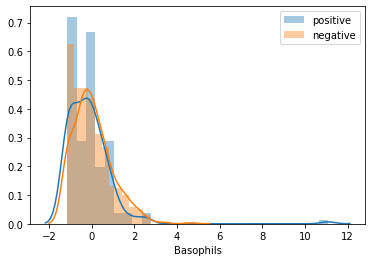

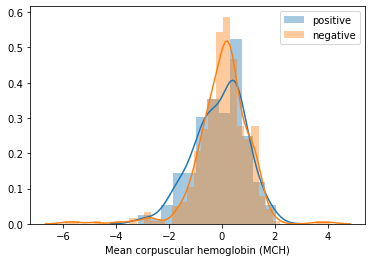

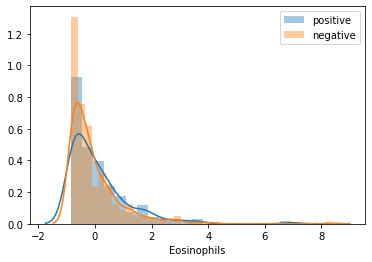

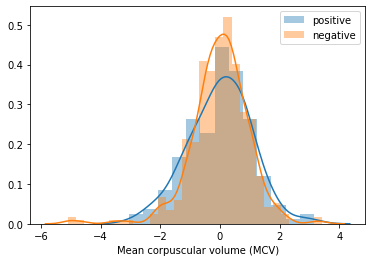

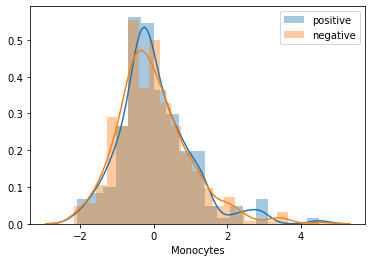

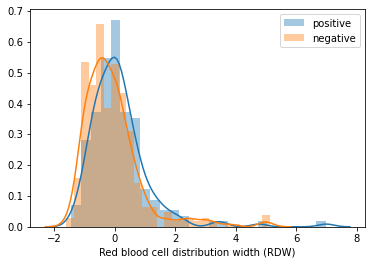

In [34]:
#relationship between blood/is_sick
for col in blood_dcols:
    plt.figure()
    sns.distplot(positive_is_sick[col], label='positive')
    sns.distplot(negative_is_sick[col], label='negative')
    plt.legend()

In [35]:
def addmited(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1 :
        return 'addmited'
    if df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1 :
        return 'semi-intensive'
    if df['Patient addmited to intensive care unit (1=yes, 0=no)']==1 :
        return 'intensive care unit'
    else: 
        return 'NAN'

In [36]:
df['statut']=df.apply(addmited, axis=1)

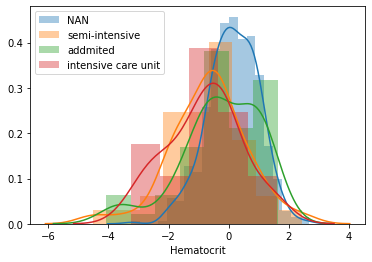

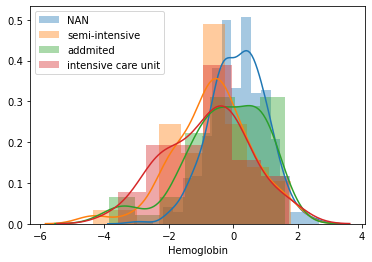

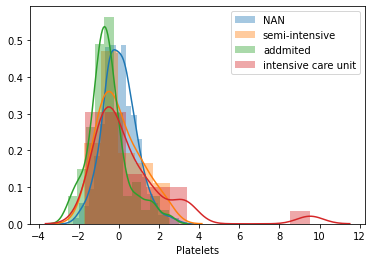

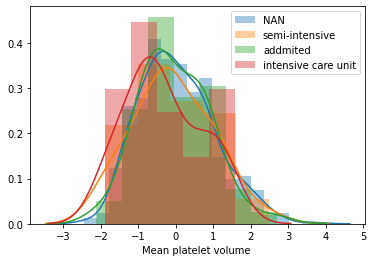

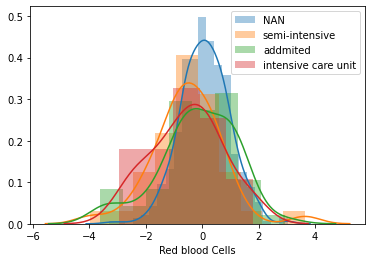

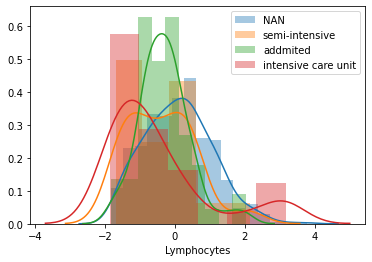

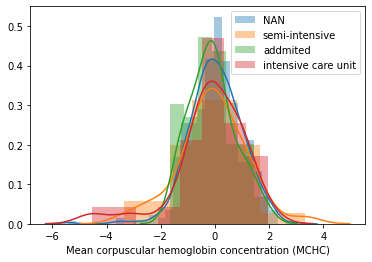

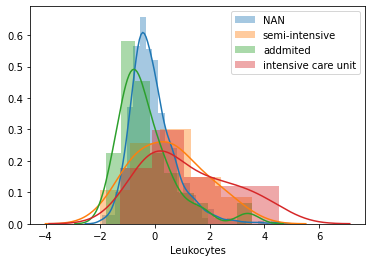

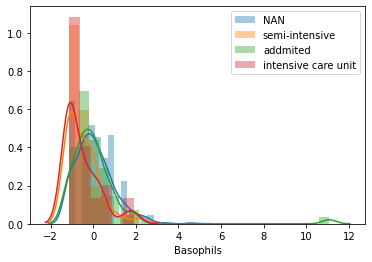

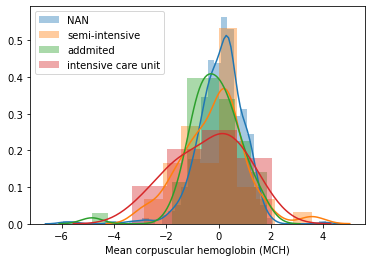

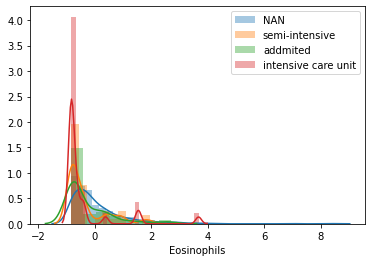

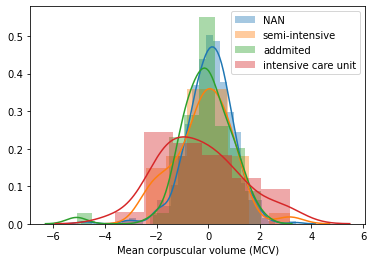

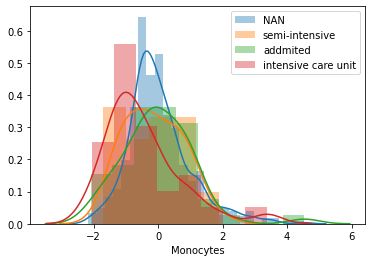

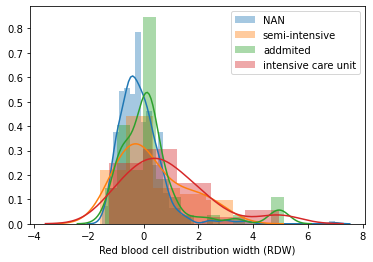

In [37]:
#relationship between blood/addmited_patient
for col in blood_dcols:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
        plt.legend()

In [38]:
#analysis of Nan values
df[blood_dcols].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [39]:
df[viral_cols[:-2]].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
dtype: int64

In [40]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

In [41]:
#if we use only viral_cols in our dataset ,positive=8% 
df1=df[viral_cols[:-2]]
df1['covid']=df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [42]:
#positive=13%
df2=df[blood_dcols]
df2['covid']=df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [43]:
#use T-test 
from scipy.stats import ttest_ind


In [44]:
positive_df.shape

(558, 38)

In [45]:
negative_df.shape

(5086, 38)

In [46]:
negative_df.sample(positive_df.shape[0])

Patient age quantile SARS-Cov-2 exam result  \
2149                    10               negative   
4915                    15               negative   
5054                     0               negative   
4149                    12               negative   
1214                     2               negative   
...                    ...                    ...   
2117                     1               negative   
1504                     4               negative   
1132                     3               negative   
2775                    17               negative   
4340                    15               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
2149                                               0   
4915                                               0   
5054                                               0   
4149                                               0   
1214                                               0   
...                                              ...   
2117                                               0   
1504                                               0   
1132                                               0   
2775                                               0   
4340                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
2149                                                  0       
4915                                                  0       
5054                                                  0       
4149                                                  0       
1214                                                  0       
...                                                 ...       
2117                                                  0       
1504                                                  0       
1132                                                  0       
2775                                                  0       
4340                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
2149                                                  0             NaN   
4915                                                  0             NaN   
5054                                                  1       -0.885025   
4149                                                  0             NaN   
1214                                                  0             NaN   
...                                                 ...             ...   
2117                                                  0             NaN   
1504                                                  0             NaN   
1132                                                  0             NaN   
2775                                                  0        0.534067   
4340                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
2149         NaN        NaN                    NaN              NaN   
4915         NaN        NaN                    NaN              NaN   
5054   -1.087492  -0.793773              -0.662483         0.172526   
4149         NaN        NaN                    NaN              NaN   
1214         NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
2117         NaN        NaN                    NaN              NaN   
1504         NaN        NaN                    NaN              NaN   
1132         NaN        NaN                    NaN              NaN   
2775    0.353596  -0.580222               0.459449         0.102004   
4340         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
2149          NaN                                               NaN   
4915          NaN                          

In [47]:
balanced_neg=negative_df.sample(positive_df.shape[0])
def t_test(col):
    alpha =0.02
    stat,p=ttest_ind(balanced_neg[col].dropna(),positive_df[col].dropna())
    if p<alpha:
        return 'H0 rejected'
    else:
        return 0
    

In [48]:
for col in blood_dcols:
    print(f'{col:-<50}{t_test(col)}')

Hematocrit----------------------------------------H0 rejected
Hemoglobin----------------------------------------H0 rejected
Platelets-----------------------------------------H0 rejected
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------H0 rejected
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 rejected
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 rejected
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 rejected
Red blood cell distribution width (RDW)-----------0


***Preprocessing***

In [49]:
#create our dataframe to preprocessing
df=data.copy()
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']


In [50]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

In [51]:
#train_test
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [52]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [53]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

In [54]:
#encoding
def encoding(df):
    code={'positive':1,
    'negative':0,
    'not_detected':0,
    'detected':1}
    for col in df.select_dtypes('object'):
        df[col]=df[col].map(code)
    return df

In [55]:
#dropna
def drop(df):
    return df.dropna(axis=0)
    

In [56]:
#x,y for ML
def preprocessing(df):
    df=encoding(df)
    df=drop(df)
    X=df.drop(['SARS-Cov-2 exam result'], axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y

In [57]:
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64
0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
#modeling
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)

In [59]:
#evaluation

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [60]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))

In [61]:
evaluation(model)

[[52  2]
 [10  2]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.50      0.17      0.25        12

    accuracy                           0.82        66
   macro avg       0.67      0.56      0.57        66
weighted avg       0.78      0.82      0.78        66



In [62]:
def evaluation(model):
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
   
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                              train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()                                         
    

[[52  2]
 [10  2]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.50      0.17      0.25        12

    accuracy                           0.82        66
   macro avg       0.67      0.56      0.57        66
weighted avg       0.78      0.82      0.78        66



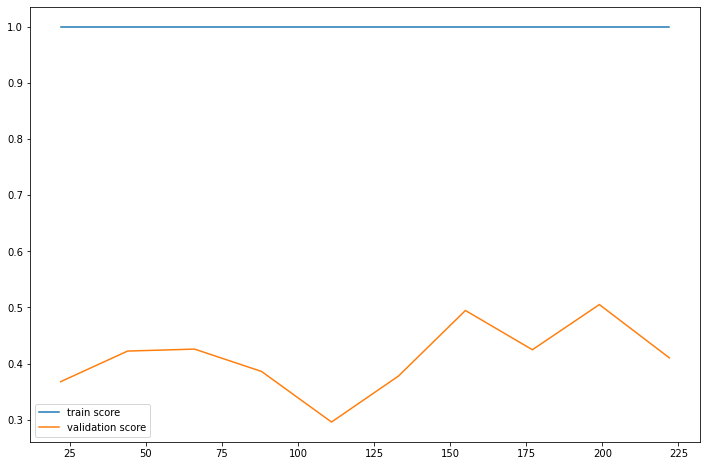

In [63]:
evaluation(model) 
#overfitting --train -score=100% (trainset)
#bad score F1 --validationset (validation_score) 
#solution -- we give more data to treat overfitting

0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64
0    1018
1     111
Name: SARS-Cov-2 exam result, dtype: int64
[[1011    7]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.46      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.68      0.52      0.52      1129
weighted avg       0.86      0.90      0.86      1129



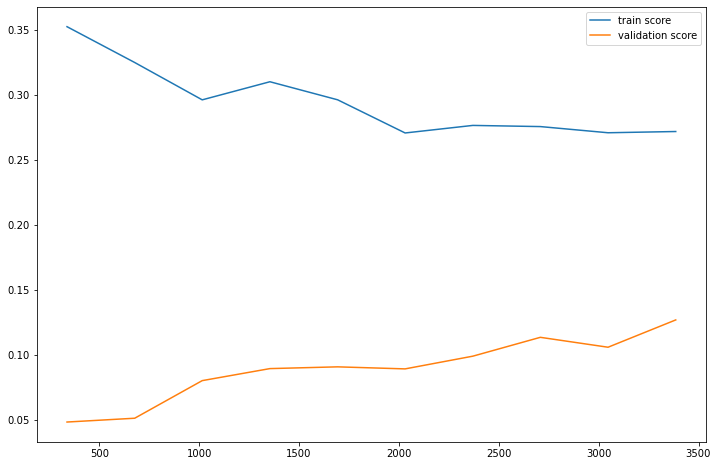

In [64]:
#preprocessing with fillna
def fill(df):
    return df.fillna(-999)
#x,y for ML
def preprocessing(df):
    df=encoding(df)
    df=fill(df)
    X=df.drop(['SARS-Cov-2 exam result'], axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y 
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset) 
evaluation(model) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    4068
1     447
Name: SARS-Cov-2 exam result, dtype: int64
0    1018
1     111
Name: SARS-Cov-2 exam result, dtype: int64
[[1009    9]
 [ 105    6]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1018
           1       0.40      0.05      0.10       111

    accuracy                           0.90      1129
   macro avg       0.65      0.52      0.52      1129
weighted avg       0.86      0.90      0.86      1129



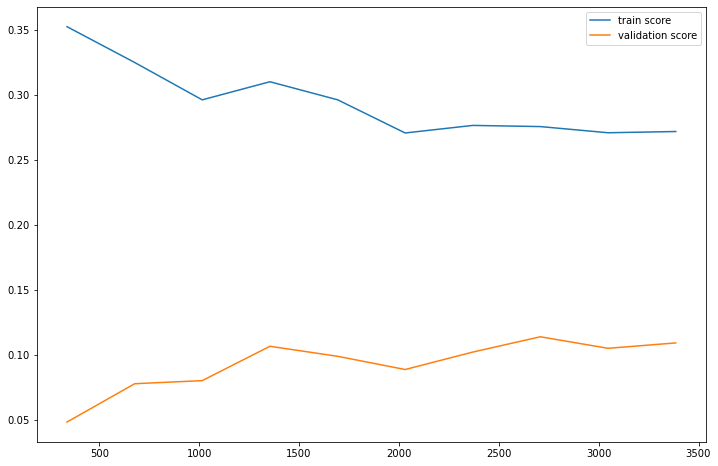

In [65]:
# preprocessing with fillna and add_missing_indicator
def imputer(df):
    df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    df=df.fillna(-999)
    return df
#x,y for ML
def preprocessing(df):
    df=encoding(df)
    df=imputer(df)
    X=df.drop(['SARS-Cov-2 exam result'], axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y 
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset) 
evaluation(model) 

#bad score with fillna(-999) and missing_values

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64
0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64
[[49  5]
 [ 8  4]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.44      0.33      0.38        12

    accuracy                           0.80        66
   macro avg       0.65      0.62      0.63        66
weighted avg       0.78      0.80      0.79        66



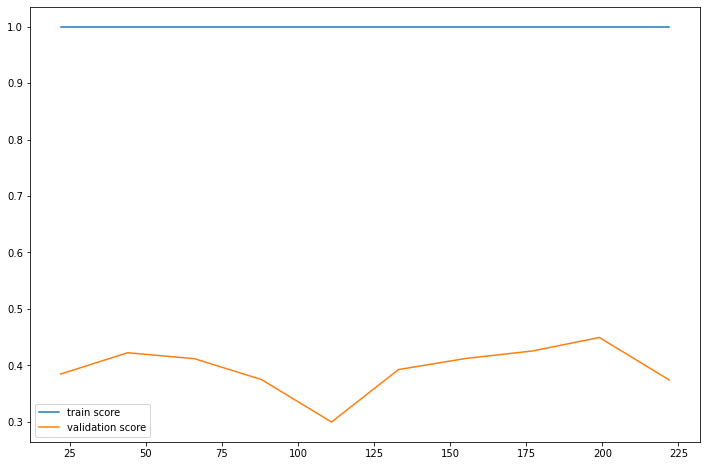

In [66]:
# preprocessing with dropna  and feature_selection
def imputer(df):
    return df.dropna(axis=0)
#x,y for ML
def preprocessing(df):
    df=encoding(df)
    df=imputer(df)
    X=df.drop(['SARS-Cov-2 exam result'], axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y 
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset) 
evaluation(model) 

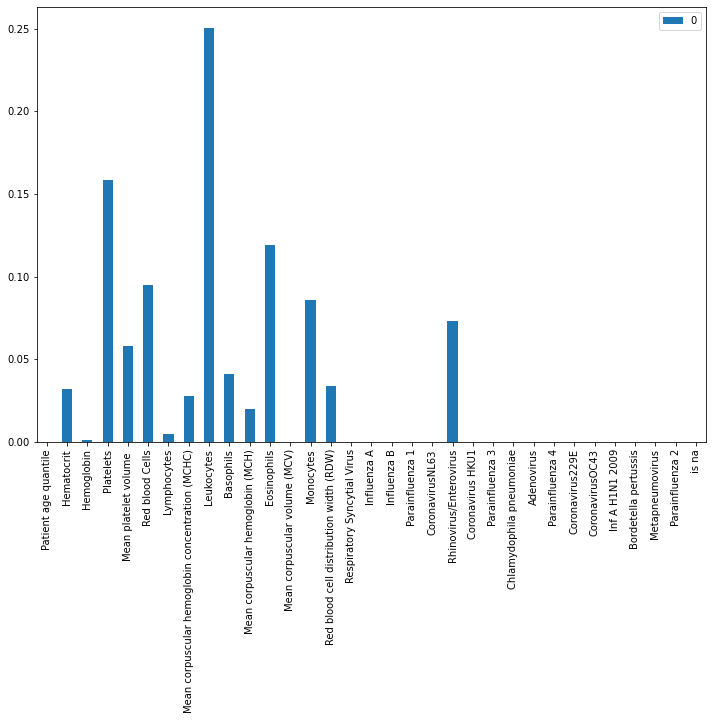

In [67]:
#feature_selection
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))
#viral_feature are not importante for our model
#solution1:drop viral_features
#solution2:dropnan blood-feature

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64
0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64
[[87  8]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.43      0.38      0.40        16

    accuracy                           0.84       111
   macro avg       0.66      0.65      0.65       111
weighted avg       0.83      0.84      0.83       111



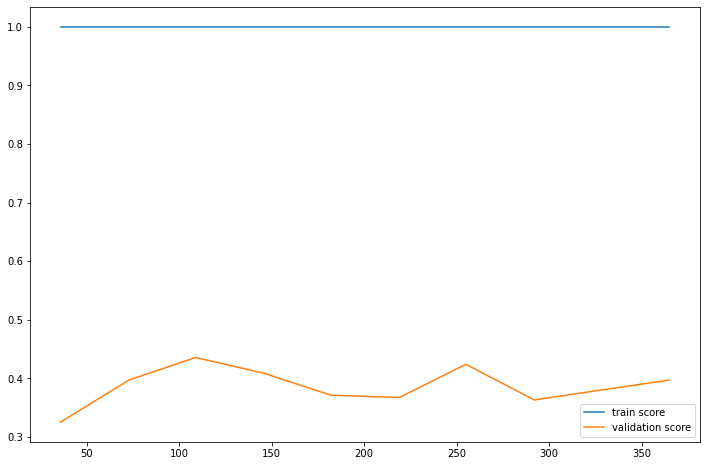

In [68]:
df = df[key_columns + blood_columns]# + viral_columns]
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)
# preprocessing with dropna  and feature_selection
def imputer(df):
    return df.dropna(axis=0)
#x,y for ML
def preprocessing(df):
    df=encoding(df)
    df=imputer(df)
    X=df.drop(['SARS-Cov-2 exam result'], axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y 
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset) 
evaluation(model) 

# overfitting with solution1+solution2
#solution3:other model like randomforest

In [69]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=0)



In [70]:
df = data.copy()
df= df[key_columns + blood_columns + viral_columns]
df.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64
0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64
[[54  0]
 [11  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        54
           1       1.00      0.08      0.15        12

    accuracy                           0.83        66
   macro avg       0.92      0.54      0.53        66
weighted avg       0.86      0.83      0.77        66



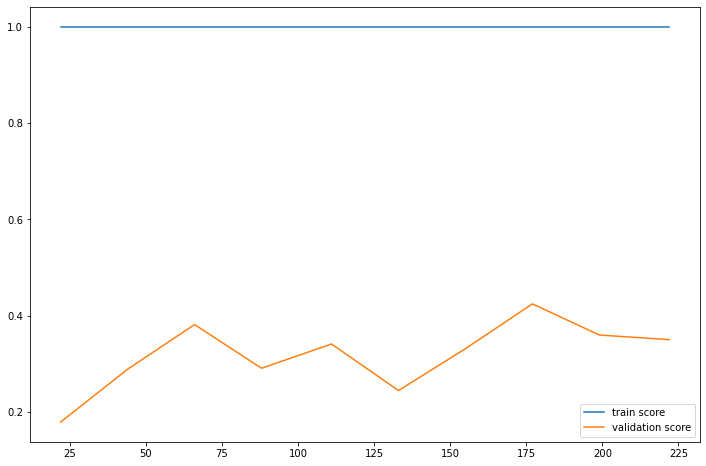

In [71]:

trainset,testset=train_test_split(df,test_size=0.2,random_state=0)
# preprocessing with dropna  and feature_selection
def imputer(df):
    return df.dropna(axis=0)
#x,y for ML
def preprocessing(df):
    df=encoding(df)
    df=imputer(df)
    X=df.drop(['SARS-Cov-2 exam result'], axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())
    return X,y 
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset) 
evaluation(model) 

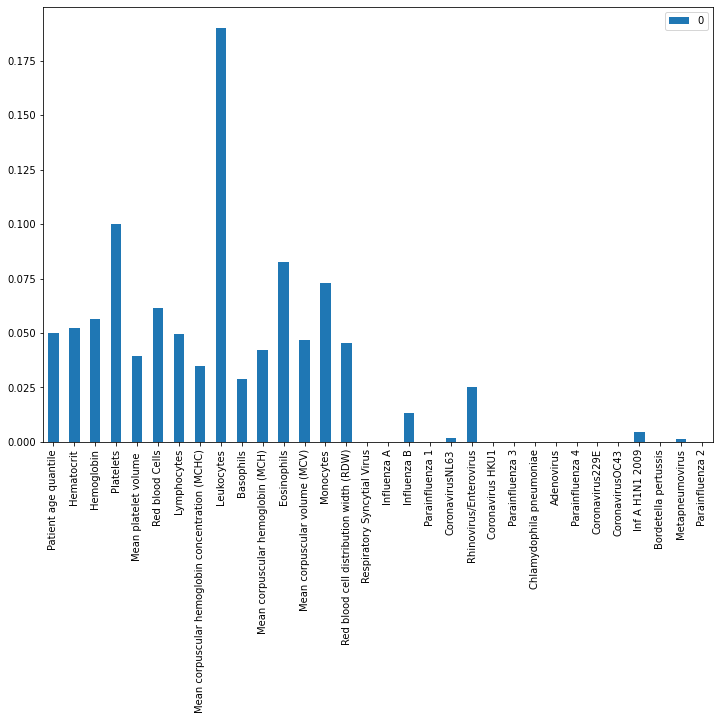

In [72]:
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))
#solution: use feature engeering:'is_sick'with blood features


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64
0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64
[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



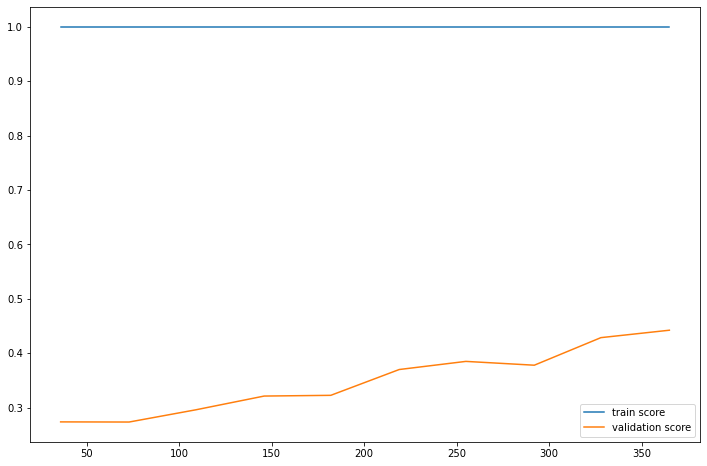

In [73]:

def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df
    

def preprocessing(df):
    
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)
evaluation(model)
#solution: define the threshold to feature-selection

In [74]:
#modeling
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [75]:
#select the 10 best feature for the model
model_1 = RandomForestClassifier(random_state=0)

model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



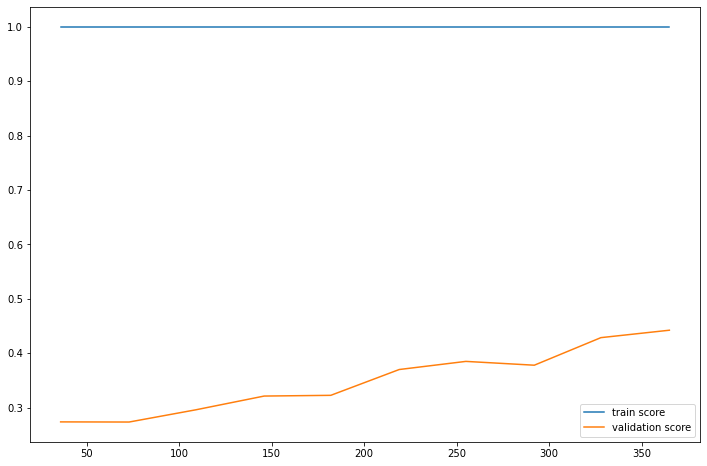

In [76]:
evaluation(model_1)

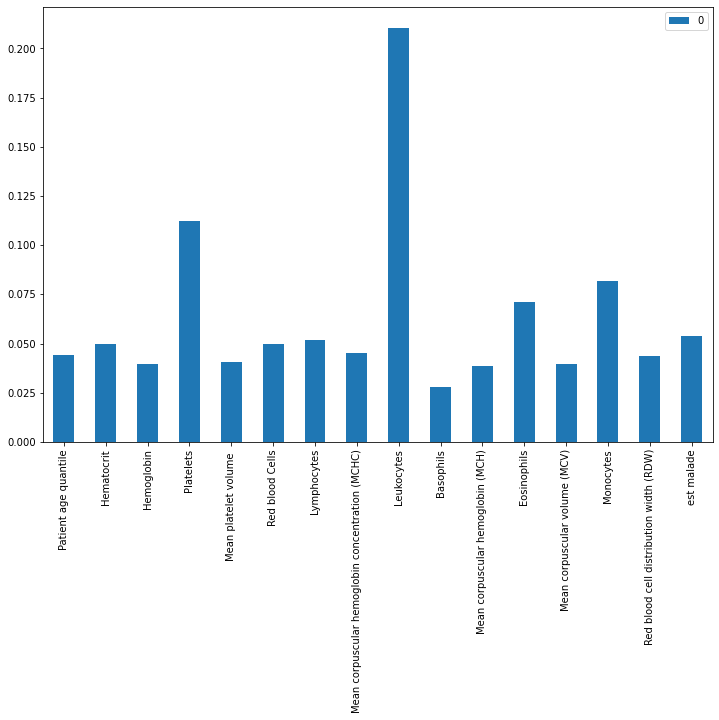

In [77]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

In [78]:
#Use different ML models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [79]:
prep = make_pipeline(PolynomialFeatures(2,include_bias=False), SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(prep, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(prep, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(prep, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(prep, StandardScaler(), KNeighborsClassifier())
models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

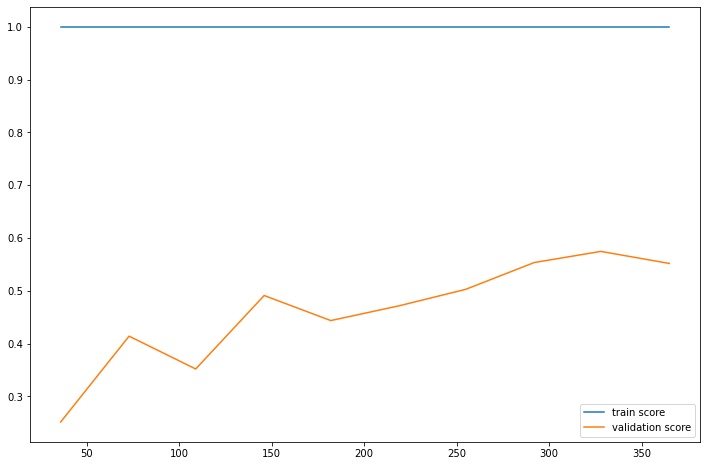

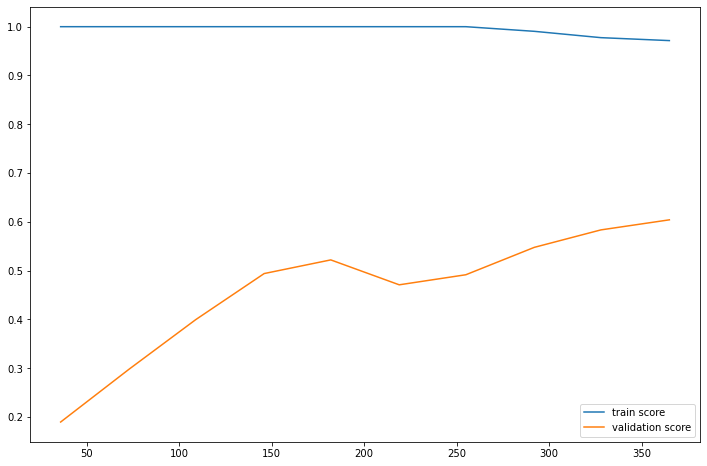

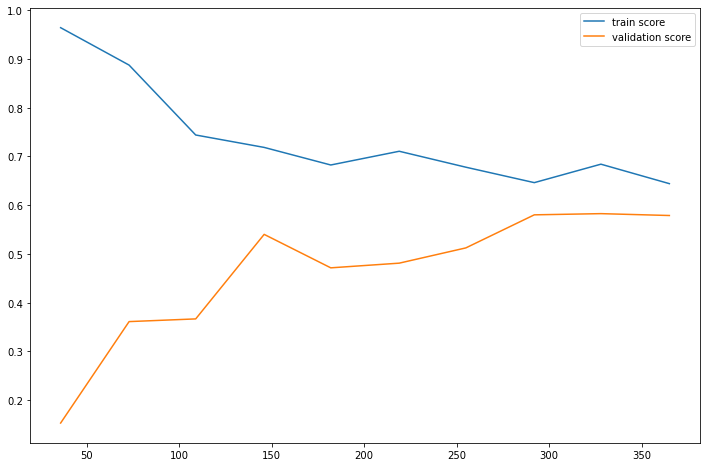

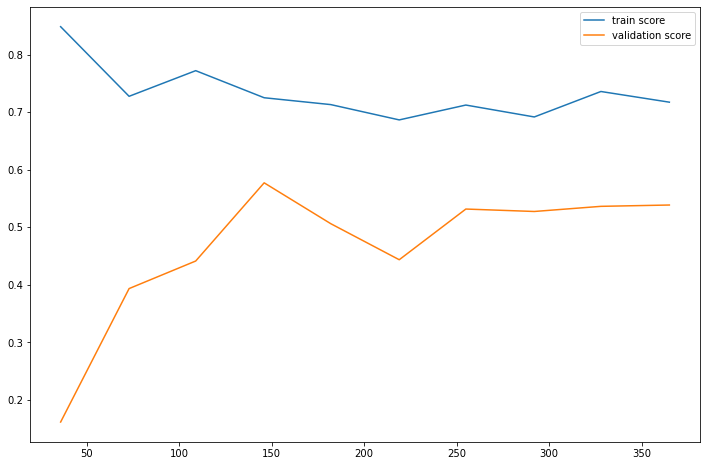

In [80]:
for name, model in models.items():
    print(name)
    evaluation(model)

In [81]:
#we choose AdaBoost and SVM with  hight f1-score
#optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [82]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [83]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [84]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__gamma': 0.0001, 'svc__C': 3000, 'pipeline__selectkbest__k': 52, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.50      0.50      0.50        16

    accuracy                           0.86       111
   macro avg       0.71      0.71      0.71       111
weighted avg       0.86      0.86      0.86       111



In [85]:
#use of precision_recall_curve
from sklearn.metrics import precision_recall_curve

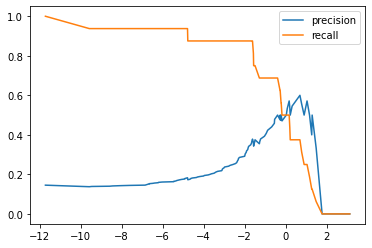

In [86]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()
#we choose throusold=-1 for best recal

In [87]:
#our final SVM model with thresold=-1
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)
from sklearn.metrics import recall_score
f1_score(y_test, y_pred)
recall_score(y_test, y_pred)

0.6875